# Evaluation of driven simulation

In [3]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import ipywidgets as widgets

from ernesto.postprocessing.visualization import ernesto_plotter
from ernesto.postprocessing.metrics import compute_metrics, _mse

ModuleNotFoundError: No module named 'ipywidgets'

In [2]:
folder = "../data/output/driven"
folder = folder + '/paper_dic24'
path = Path(folder)

In [104]:
file_types = ['None']
file_types.extend(os.listdir(path))
file_types = [f for f in file_types if not f.startswith('.')]
file_types = sorted(file_types)

y = widgets.Dropdown(
    options=file_types,
    value='None',
    description='Select experiment folder:',
    disabled=False)

def on_folder_selection(selection):
    if selection['type'] == 'change' and selection['name'] == 'value':
        print("Selected path containing simulation data: %s" % path + '/' + selection['new'])
    y.disabled = True
    
y.observe(on_folder_selection)

display(y)

Dropdown(description='Select experiment folder:', index=1, options=('20C_check_up', 'None', 'invecchiamento_no…

In [105]:
files = ['None']
specific_exp_path = path / y.value
files.extend(os.listdir(specific_exp_path))
files = [f for f in files if not f.startswith('.')]
files = sorted(files)

w = widgets.Dropdown(
        options=files,
        value='None',
        description='Select the desired experiment:',
        disabled=False)

def on_exp_selection(selection):
    if selection['type'] == 'change' and selection['name'] == 'value':
        print("Selected path containing simulation data: %s" % path + '/' + selection['new'])
    
    w.disabled = True

w.observe(on_exp_selection)
display(w)

Dropdown(description='Select the desired experiment:', index=1, options=('2025_02_06-16_43_11', 'None'), value…

In [106]:
specific_exp_path / w.value
file_path = specific_exp_path / w.value

In [107]:
grounds = [f for f in os.listdir(file_path) if f.startswith('ground')]
sorted(grounds)
df_ground = pd.concat((pd.read_csv(file_path / f) for f in sorted(grounds)), ignore_index=True)

In [108]:
sim_datasets = [f for f in os.listdir(file_path) if f.startswith('dataset')]
sim_datasets = sorted(sim_datasets)
df_sim = pd.concat((pd.read_csv(file_path / f) for f in sorted(sim_datasets)), ignore_index=True)

In [109]:
df_sim

,time,soc,soh,c_max,voltage,current,power,v_oc,r0,r1,c,v_r0,v_rc,i_r1,i_c,temperature,heat,t_amb,dVoc_dT
0,-1.0,0.937000,1.0,20.0,4.124500,0.0000,0.000000,0.000000,0.003337,0.002339,15448.591973,0.000000,0.000000,0.000000,0.000000,312.337000,0.000000,305.1900,-0.000043
1,0.0,0.937000,1.0,20.0,4.114899,-0.0000,0.000000,4.114899,0.003337,0.002339,15448.591973,-0.000000,0.000000,0.000000,-0.000000,312.305568,0.000000,311.8818,-0.000043
2,1.0,0.937000,1.0,20.0,4.114899,-0.0000,0.000000,4.114899,0.003337,0.002339,15448.591973,-0.000000,0.000000,0.000000,-0.000000,312.271543,0.000000,311.8128,-0.000043
3,2.0,0.937000,1.0,20.0,4.114899,-0.0000,0.000000,4.114899,0.003337,0.002339,15448.591973,-0.000000,0.000000,0.000000,-0.000000,312.246433,0.000000,311.9079,-0.000043
4,3.0,0.937000,1.0,20.0,4.114899,-0.0000,0.000000,4.114899,0.003337,0.002339,15448.591973,-0.000000,0.000000,0.000000,-0.000000,312.223534,0.000000,311.9148,-0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33269,33268.0,0.651422,1.0,20.0,3.832689,-4.0108,15.372150,3.799883,0.003878,0.004521,16294.334588,-0.015552,-0.017254,-3.816784,-0.194016,284.839946,0.128231,284.7110,0.000017
33270,33269.0,0.651477,1.0,20.0,3.832724,-4.0099,15.368840,3.799901,0.003880,0.004524,16285.303152,-0.015558,-0.017266,-3.816872,-0.193028,284.833955,0.128286,284.7508,0.000017
33271,33270.0,0.651533,1.0,20.0,3.832772,-4.0124,15.378615,3.799918,0.003882,0.004527,16276.273743,-0.015576,-0.017278,-3.816994,-0.195406,284.829317,0.128447,284.7644,0.000017
33272,33271.0,0.651589,1.0,20.0,3.832806,-4.0112,15.374151,3.799936,0.003884,0.004530,16267.238705,-0.015580,-0.017290,-3.817098,-0.194102,284.830247,0.128493,284.8404,0.000017


In [110]:
df_ground

,current,voltage,temperature,t_amb,power,time
0,0.0000,4.1245,312.3370,311.8818,0.000000,0.0
1,0.0000,4.1245,312.3151,311.8128,0.000000,1.0
2,0.0000,4.1245,312.3381,311.9079,0.000000,2.0
3,0.0000,4.1245,312.2879,311.9148,0.000000,3.0
4,0.0000,4.1245,312.3373,311.9258,0.000000,4.0
...,...,...,...,...,...,...
33268,4.0108,3.8993,285.0511,284.7110,15.639463,33268.0
33269,4.0099,3.8994,285.0170,284.7508,15.636117,33269.0
33270,4.0124,3.8994,285.0793,284.7644,15.646045,33270.0
33271,4.0112,3.8996,285.1648,284.8404,15.642228,33271.0


### Compute metrics to evaluate the simulation
The simulated dataset might have more entries than the ground one. <br>
This happens when the timestep is high in certain points, and the simulator induces an additional rest step, that is stored within the simulated dataset, but that is not present among ground samples. <br>
Thus, we need to compare only the sample which belong to both the datasets.

In [111]:
vars_to_compare = ['voltage', 'temperature']
ground_dict = {}
sim_dict = {}

for var in vars_to_compare:
    ground_dict[var] = df_ground[var].values
    sim_dict[var] = df_sim[df_sim['time'].isin(df_ground['time'].values)][var].values

compute_metrics(ground=ground_dict, 
                simulated=sim_dict, 
                vars=vars_to_compare, 
                metrics=None, 
                steps=None)

{'voltage': {'mse': 0.0021317152626731434,
  'mae': 0.03840006806125598,
  'mape': 0.9949470150234722,
  'max_abs_err': 0.12828620618858677},
 'temperature': {'mse': 1.0049640891576046,
  'mae': 0.530464873190744,
  'mape': 0.17369528861097228,
  'max_abs_err': 6.455533649757456}}

### Comparison of simulated and ground data
In this example, the current used as input is the inverse of the signal saved as output, since the DT converts the current signal to the active convetion. Hence, only for the current, there is this discrepancy between the ground and simulated variable.

In [112]:
comparison_params = {
    'dfs': [df_ground, df_sim], 
    'variables': ['current', 'voltage', 'temperature'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': ['Ground', 'Simulated'],
    'x_labels': ['Time [s]'] * 3,
    'y_labels': ['[A]', '[V]', '[K]'],
    'markers': ['o', 's'],
    'line_styles': ['--', '-'],
    'title': 'Current',
    'save_fig': False,
    'sampling_rate': 1,
    'colors': ['cyan', 'violet'],
    'plot_type': 'line',
    'dest': file_path, 
    'fig_name': '20C',
    'pic_format': 'png',
    'figsize': (15, 4),
    'tick_font_size': 16,
    'label_font_size': 18,
    'legend_font_size': 14,
    'figsize': (15, 5)
}

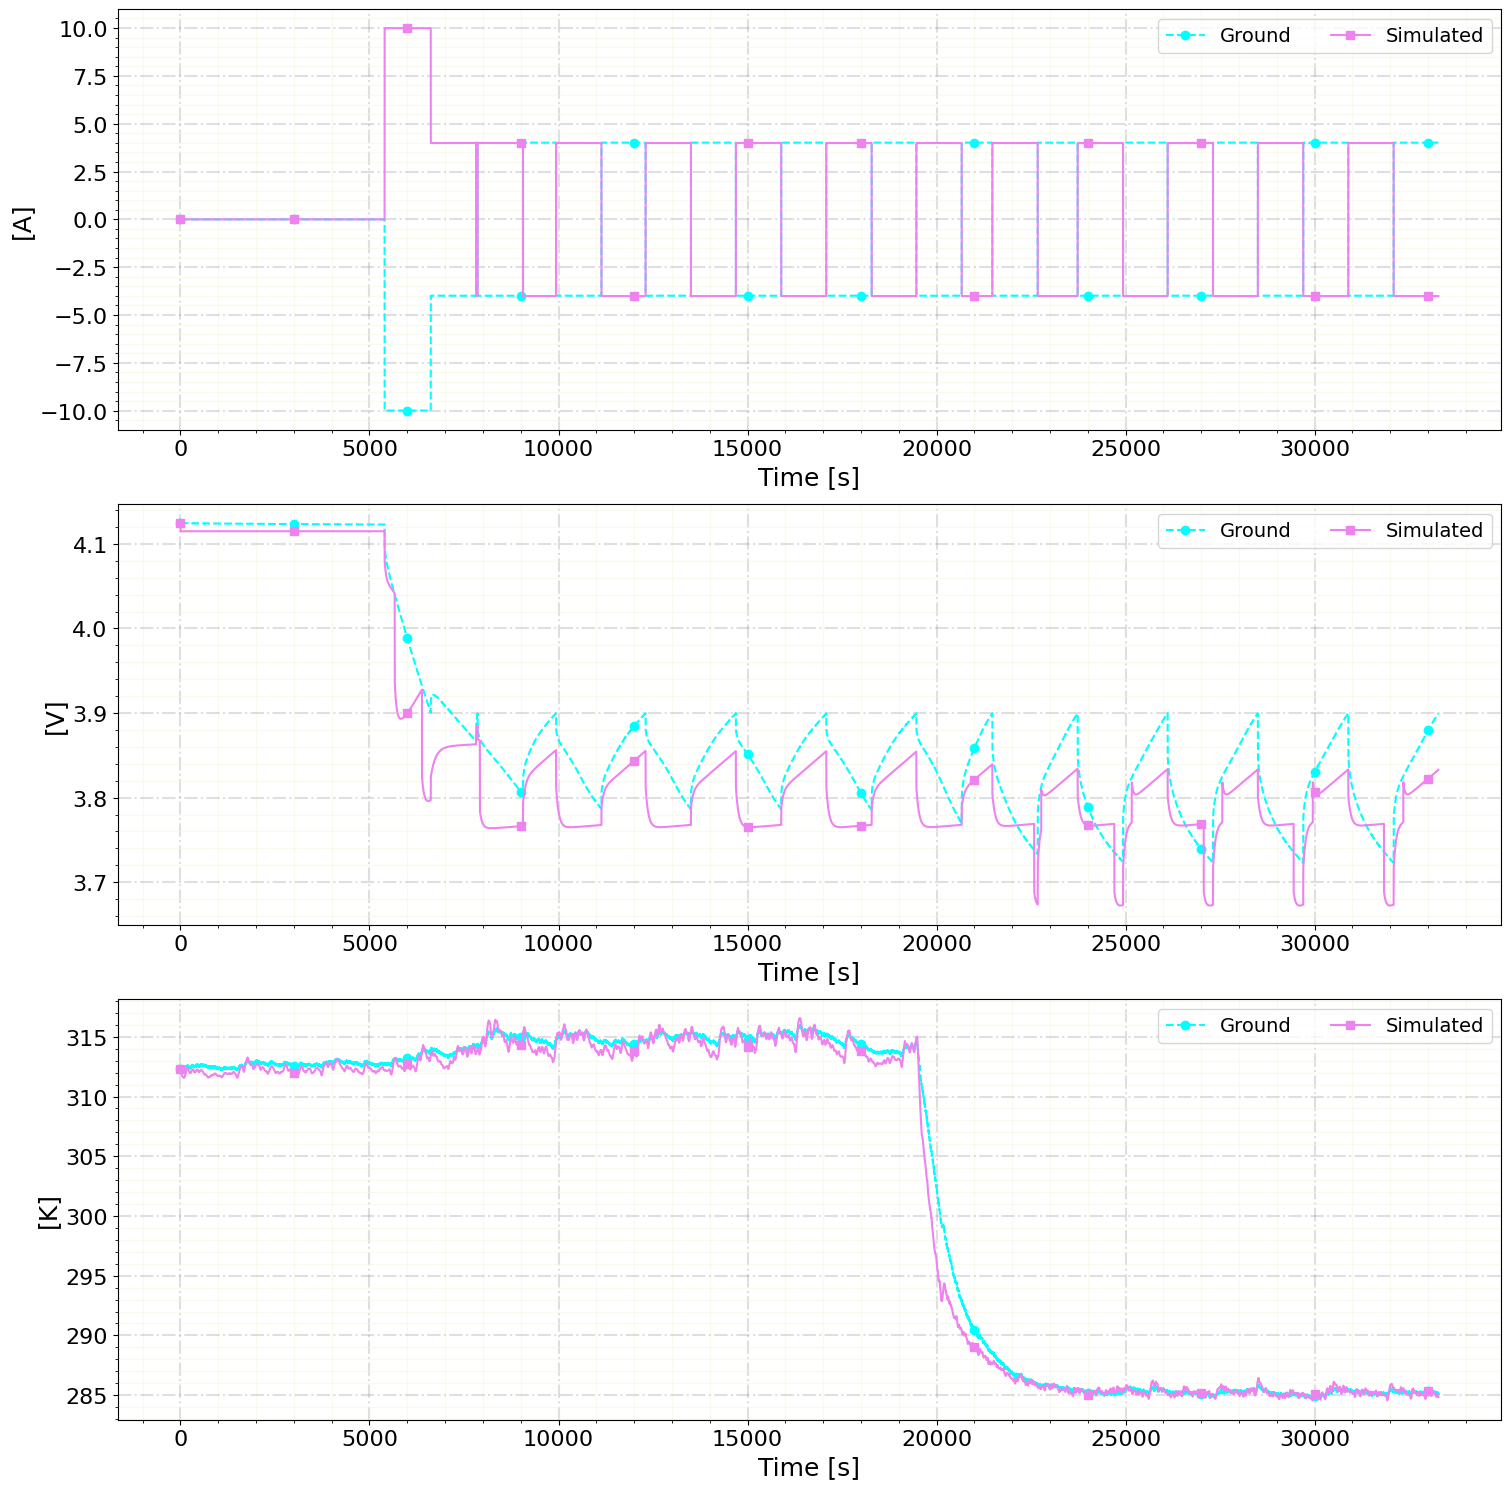

In [113]:
ernesto_plotter(**comparison_params)

### Plot standalone variables

In [38]:
single_plot_params = {
    'dfs': [df_ground],
    'variables': ['current', 'voltage', 't_amb'], 
    'x_axes': ['time', 'time', 'time', 'time'], 
    'x_labels': ['Time [s]'] * 4,
    'y_labels': ['[A]', '[V]', '[K]'],
    'labels': ['Ground'],
    'markers': ['s', 'o', 's', 'o'],
    'line_styles': ['solid', 'dashed', 'dashed', 'solid'],
    'plot_type': 'line',
    'sampling_rate': 1,
    'colors': ['purple'],
    'save_fig': False,
    'fig_name': 'PV',
    'pic_format': 'png',
    'tick_font_size': 16,
    'label_font_size': 18,
    'legend_font_size': 14,
    'figsize': (15, 5),
    'dest': file_path
}

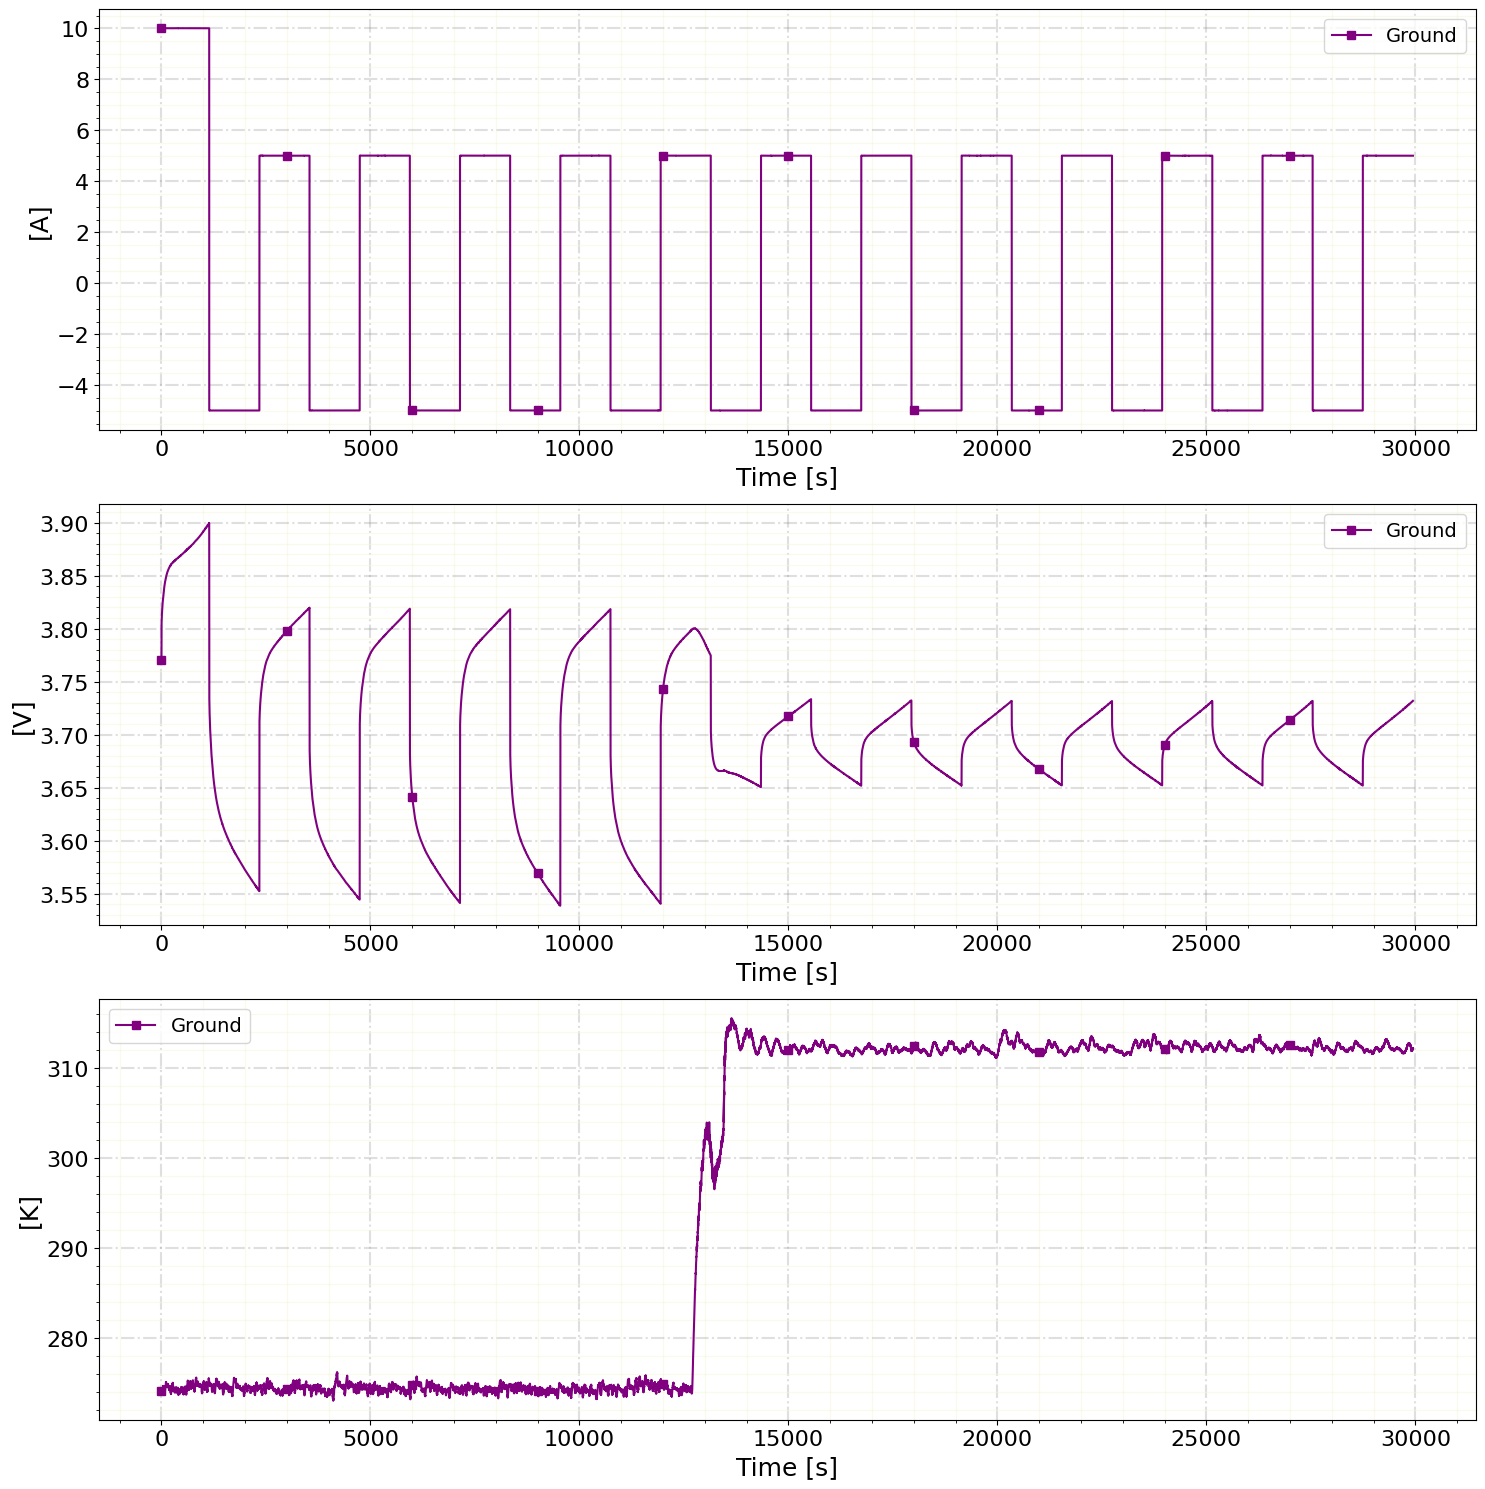

In [39]:
ernesto_plotter(**single_plot_params)

In [44]:
electrical_params = {
    'dfs': [df_sim],
    'variables': ['r0', 'r1', 'c1', 'soc', 'temperature'], 
    'x_axes': ['time', 'time', 'time', 'time', 'time'], 
    'x_labels': ['Time [s]'] * 5,
    'y_labels': ['R0 [ohm]', 'R1 [ohm]', 'C [F]', 'SoC [%]', 'Temperature [K]'],
    'labels': ['Simulated'],
    'markers': ['', '', '', '', ''],
    'line_styles': ['solid', 'solid', 'solid', 'solid', 'solid'],
    'plot_type': 'line',
    'colors': ['purple'],
    'sampling_rate': 1000,
    'save_fig': False,
    'fig_name': 'cell_ground',
    'pic_format': 'png',
    'tick_font_size': 16,
    'label_font_size': 18,
    'legend_font_size': 14,
    'figsize': (15, 5),
    'dest': file_path
}

KeyError: 'c1'

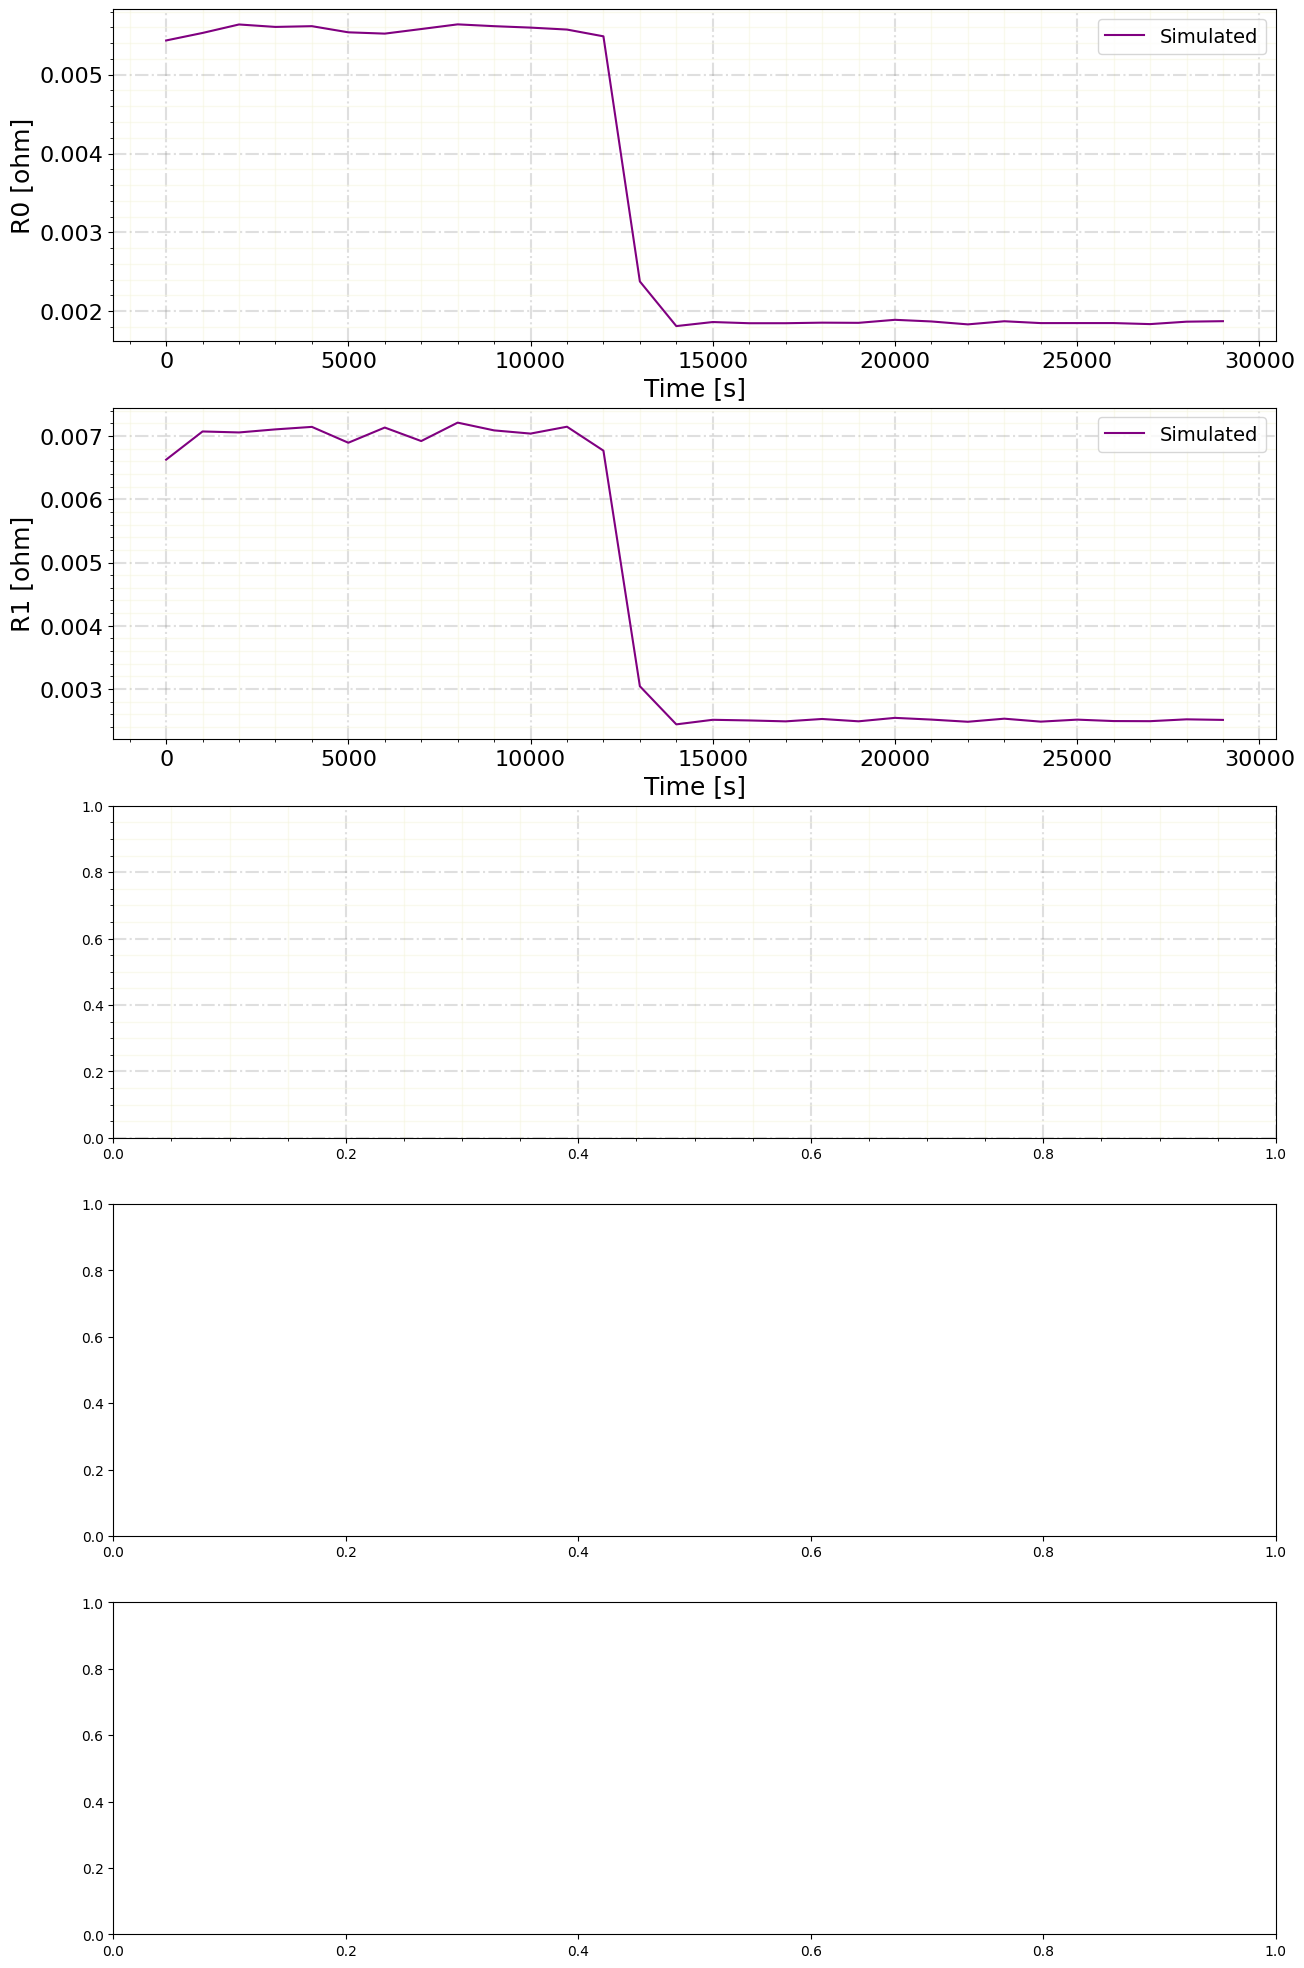

In [45]:
ernesto_plotter(**electrical_params)

In [17]:
ground_params = {
    'dfs': [df_ground],
    'variables': ['current'], 
    'x_axes': ['time'], 
    'x_labels': ['Time [s]'],
    'y_labels': ['[A]'],
    'labels': ['Ground'],
    'markers': ['s'],
    'line_styles': ['solid'],
    'plot_type': 'line',
    'colors': ['purple'],
    'sampling_rate': 1,
    'save_fig': False,
    'fig_name': 'PV',
    'pic_format': 'png',
    'tick_font_size': 16,
    'label_font_size': 18,
    'legend_font_size': 14,
    'figsize': (15, 5),
    'dest': file_path
}

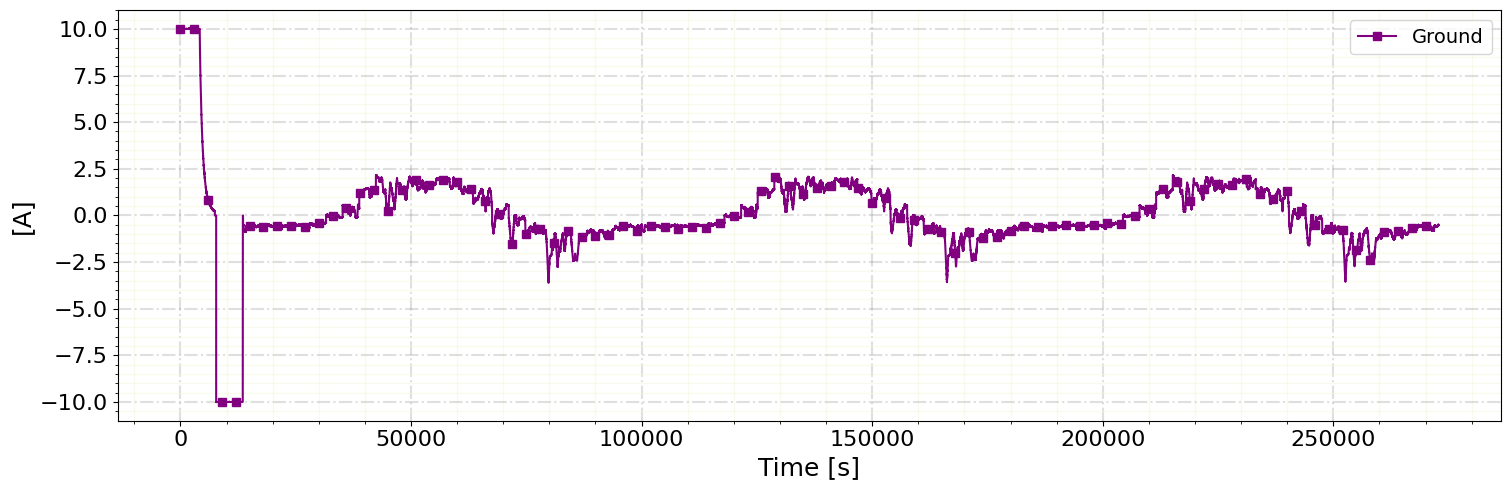

In [18]:
ernesto_plotter(**ground_params)